In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


### Trataremos de calcular un espectro de lyapunov de algo simple
### Sea la eq de Fourier del calor
### du/dt = d2/dx2u


### m-LCE
### Definimos el mapa tangente, que es identico a la eq pues el lineal

dt = .01
dx = 1
L = 50

x = np.arange(-L,L, dx)/2.0
u_inicial = np.zeros(len(x))
u = u_inicial

sigma = 10.0
rho = 28.0
beta= 8.0/3.0

def laplacian(vector):
    laplacian = (np.roll(vector, -1) - 2*vector + np.roll(vector, 1))/dx**2
    return laplacian

def f(u):
    return laplacian(u)

def tan_f(du):
    return f(du)

def time_step(u):
    u_new = u + dt*f(u)
    return u_new

def tangent_time_step(du):
    du_new = du + dt*f(du)
    return du_new

def lorenz(u):
    x,y,z = u
    return np.array([sigma*(y-x), x*(rho-z)-y, x*y - beta*z])

def tan_lorenz(u,du):
    x,y,z = u
    M = np.array([[-sigma, sigma, 0],[rho-z, -1, -x], [y,x,-beta]])
    return np.dot(M, du)

def time_step_lorenz(u):
    return u + dt*lorenz(u)

def time_step_tan_lorenz(u, du):
    return du + dt*tan_lorenz(u, du)


def gramm_schmidt(basis): 
    n = len(basis) 
    basis_new = np.copy(basis) 
    basis_new_rn = np.copy(basis)
    norms = np.zeros(n)
    for i in range(n): 
        diff = 0 
        for j in range(i): 
            diff = diff + np.dot(basis[i], basis_new_rn[j])*basis_new_rn[j]
        basis_new[i] = basis[i] - diff 
        norms[i] = np.linalg.norm(basis_new[i])
        basis_new_rn[i] = basis_new[i]/norms[i]
    return basis_new, basis_new_rn, norms


def lyapunov_spectra(time_step, time_step_tan, u_inicial, p):
    N = len(u_inicial)
    assert p<=N
    u = u_inicial
    basis = np.zeros((p,N))
    for i in range(p):
        basis[i] = np.random.rand(N)
    basis = gramm_schmidt(basis)[1]
    T = 5000
    lce = np.zeros((T,p))
    norms = np.zeros((T,p))
    for i in range(T):
        u = time_step(u)
        basis=np.transpose(time_step_tan(u, np.transpose(basis)))
        gs = gramm_schmidt(basis)
        basis, norms[i] = gs[1], gs[2]
        for j in range(i+1):
            lce[i] = lce[i] + np.log(norms[j])
        lce[i] = lce[i]/((i+1)*dt)
    return lce[T-1]


    
    
    
    

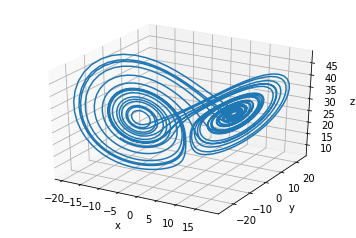

In [16]:
u_inicial = np.array([1,1,1])
u = u_inicial
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for _ in range(100):
    u = time_step_lorenz(u)
    

time_evol = []    
for _ in range(3000):
    u = time_step_lorenz(u)
    time_evol.append(u)
time_evol = np.array(time_evol)
x = time_evol[:,0]
y = time_evol[:,1]
z = time_evol[:,2]

ax.plot(x, y, z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()

In [15]:
lce = lyapunov_spectra(time_step_lorenz,time_step_tan_lorenz,u_inicial, 3)


In [117]:
n=100
basis=np.zeros((n,n))
for i in range(n):
    basis[i] = np.random.rand(n)


In [14]:
lce

array([  1.00482541,  -0.01610259, -14.93642572])

In [132]:
sum(lce)

-13.94537661175724